In [1]:
import os
import sys

# Add the project root to sys.path
cwd = os.getcwd()
project_root = os.path.dirname(cwd)
sys.path.append(project_root)

from scripts.data_analysis_utils import DataAnalysis

In [2]:
# define the data path
data_path = '../data/togo-dapaong_qc.csv'

In [3]:
# Create an instance of the DataAnalysis class
data_analyzer = DataAnalysis(data_path)

In [4]:
# Load the data
data_analyzer.load_data()

Dataset loaded successfully!


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [5]:
# Get summary statistics
summary_stats = data_analyzer.summary_statistics()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

In [6]:
# Perform data quality check
data_quality_results = data_analyzer.data_quality_check(['GHI', 'DNI', 'DHI'])
print(data_quality_results)

{'GHI': {'missing_values': 0, 'negative_values': 257385, 'outliers': 305}, 'DNI': {'missing_values': 0, 'negative_values': 0, 'outliers': 1062}, 'DHI': {'missing_values': 0, 'negative_values': 0, 'outliers': 3415}}


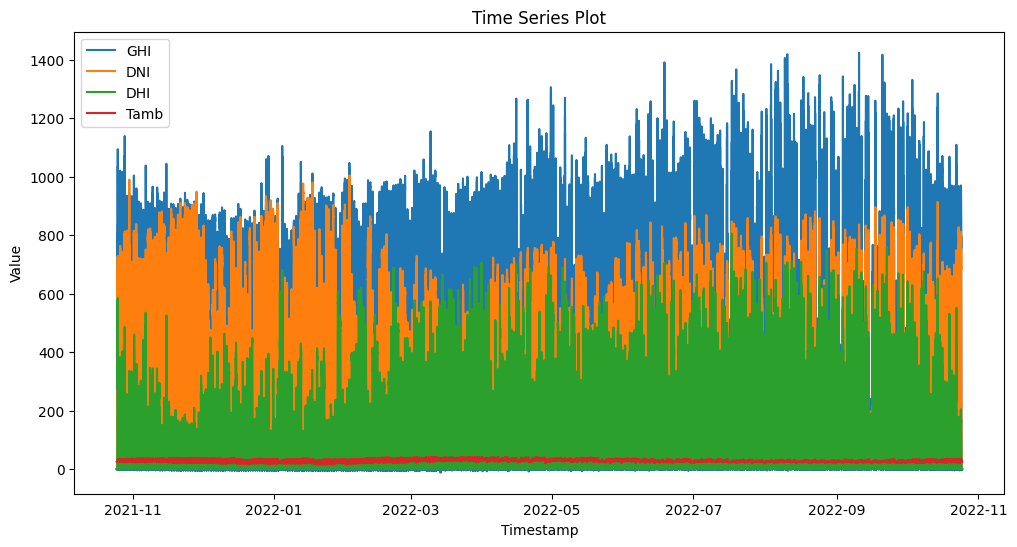

In [7]:
# Time series analysis for temperature and irradiance columns
data_analyzer.time_series_analysis(['GHI', 'DNI', 'DHI', 'Tamb'])

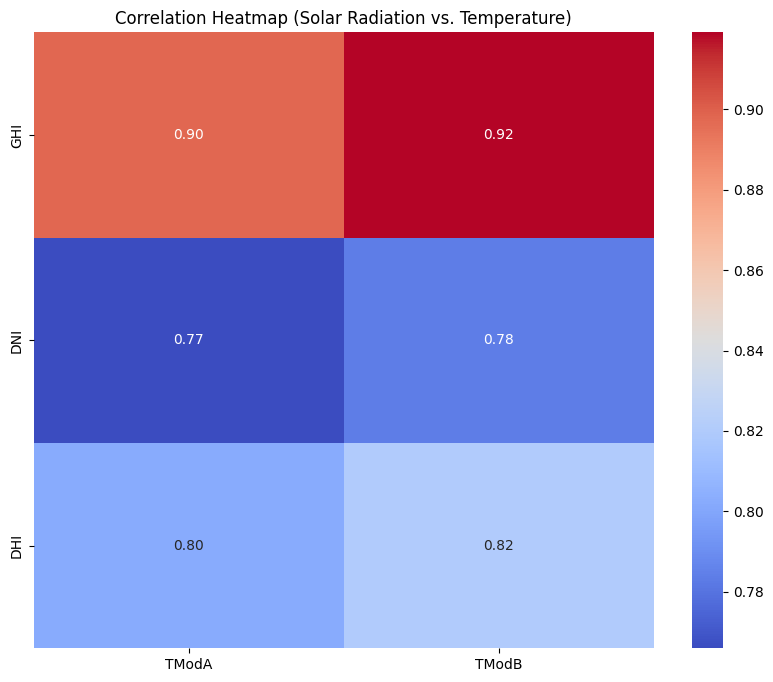

In [8]:
# Perform correlation analysis
data_analyzer.correlation_analysis("Solar Radiation", ['GHI', 'DNI', 'DHI'], "Temperature", ['TModA', 'TModB'])


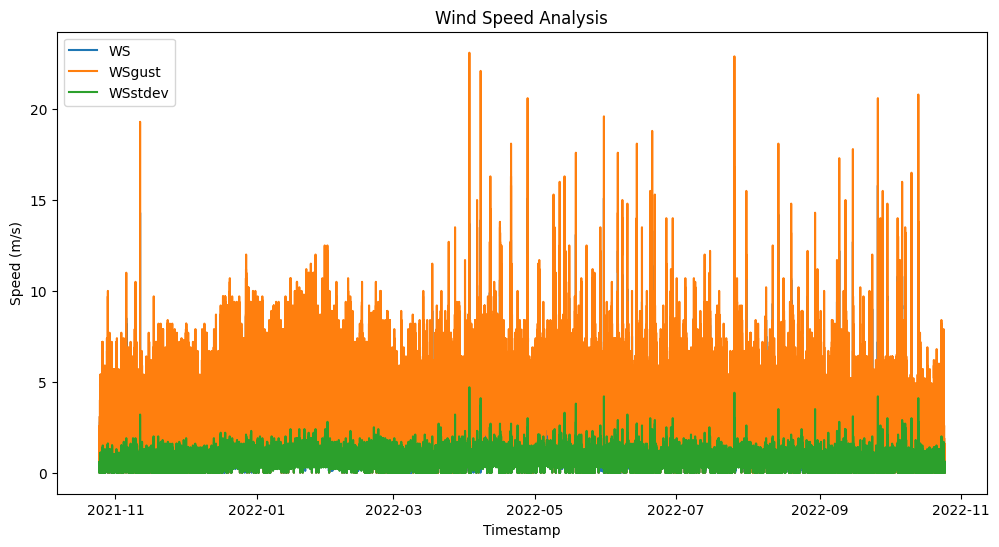

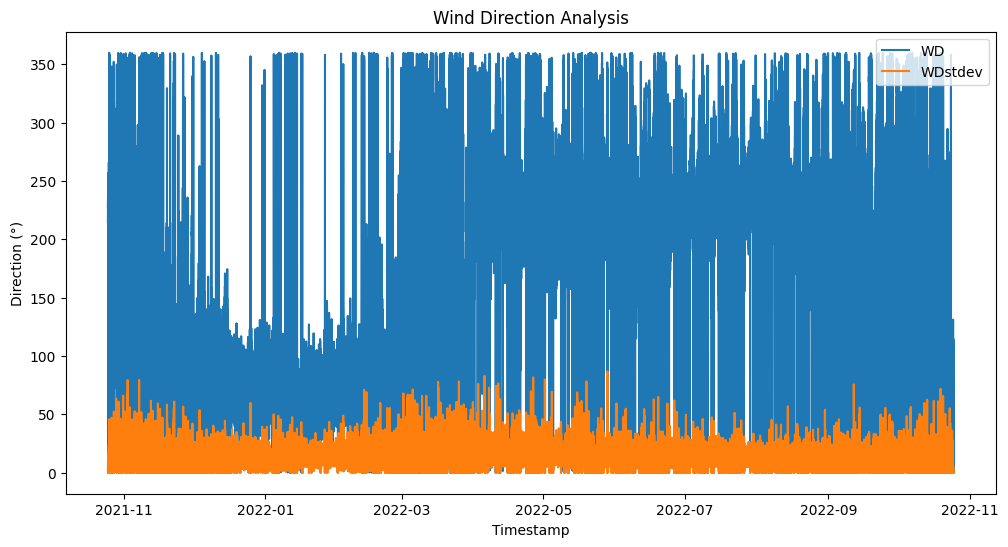

In [9]:
# Wind analysis
wind_speed_cols = ['WS', 'WSgust', 'WSstdev']
wind_direction_cols = ['WD', 'WDstdev']
data_analyzer.wind_analysis(wind_speed_cols, wind_direction_cols)

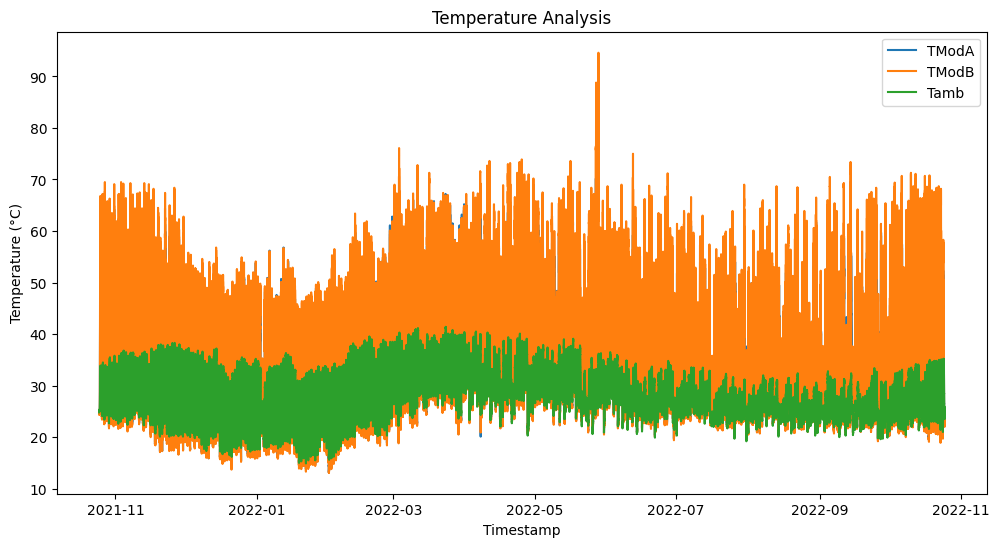

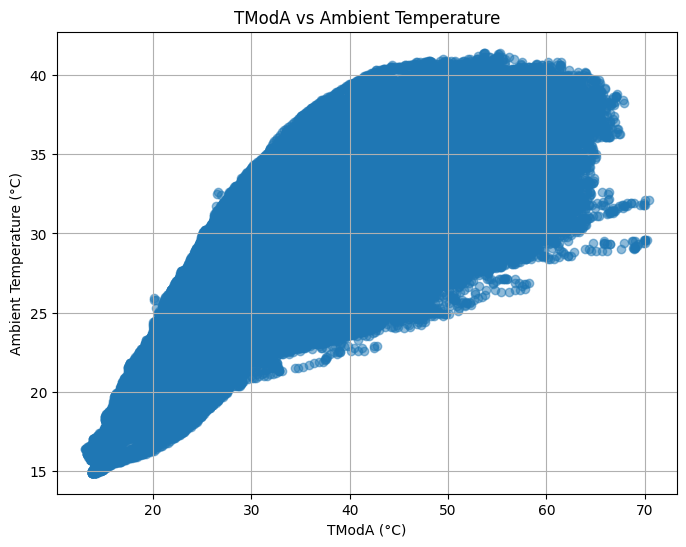

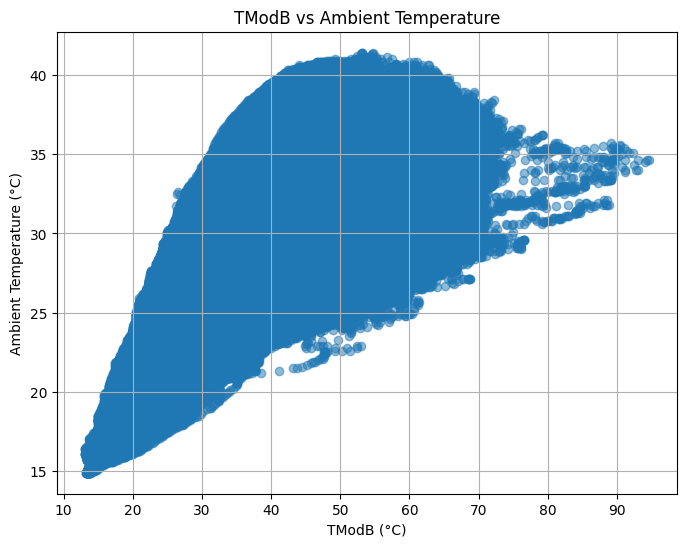

In [10]:
# Temperature analysis for module and ambient temperature columns
temperature_cols = ['TModA', 'TModB', 'Tamb']
data_analyzer.temperature_analysis(temperature_cols)

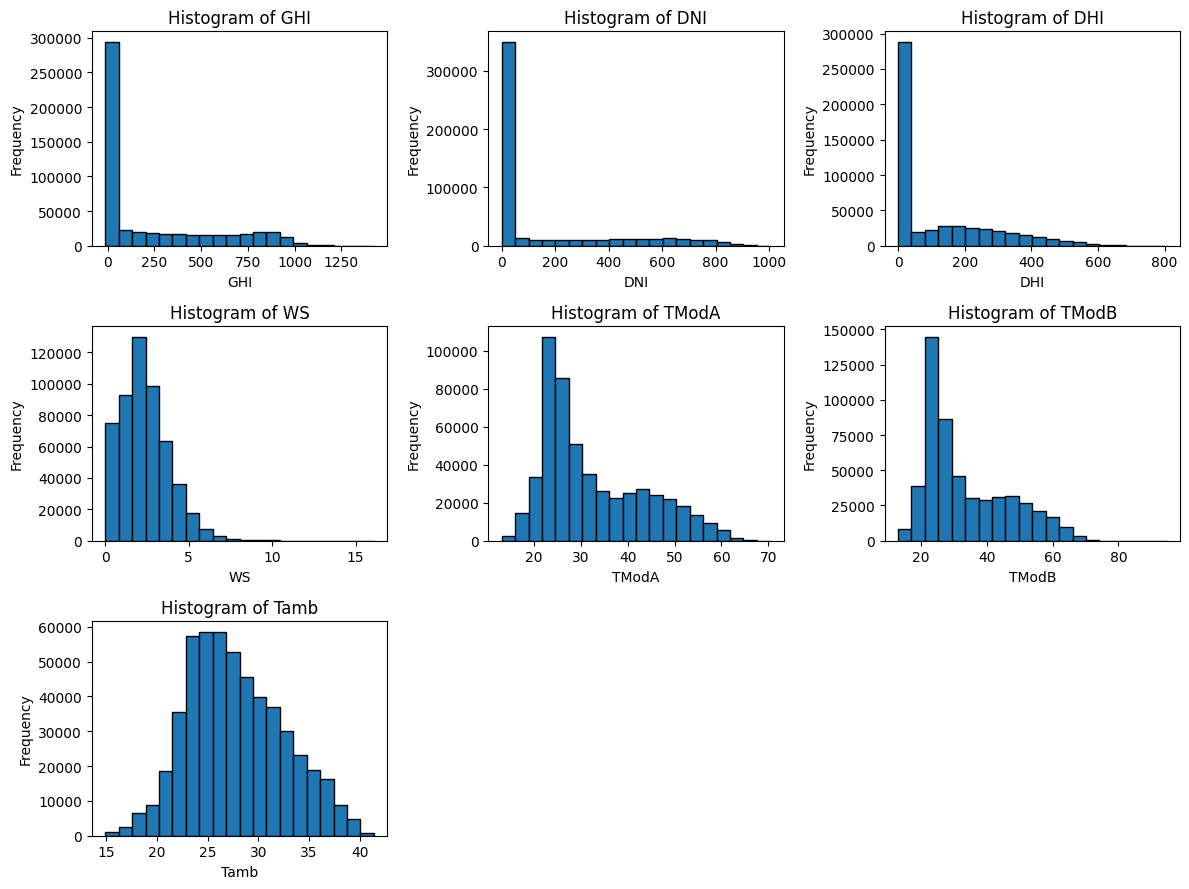

In [11]:
# Create histograms for GHI, DNI, DHI, TModA, WS
data_analyzer.histograms(['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb'])

Box Plots for Solar Radiation:


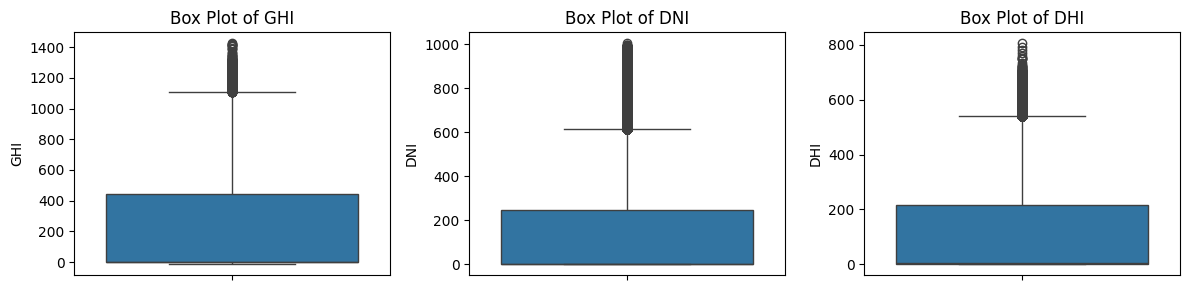

Box Plots for Temperature:


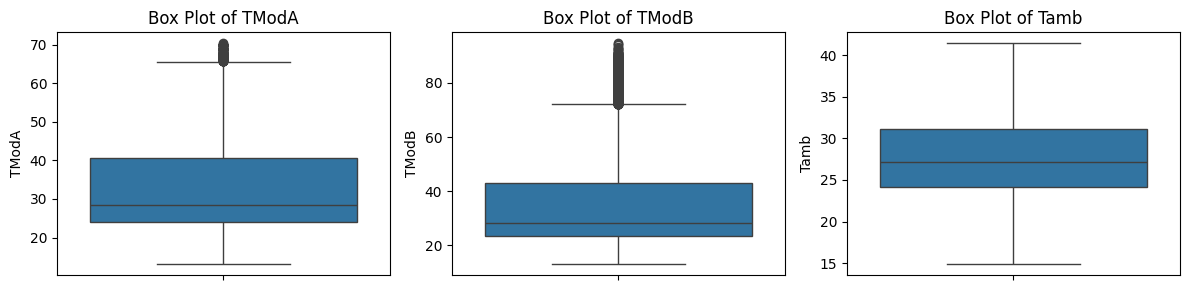

In [12]:
# Define lists containing solar radiation and temperature columns
solar_radiation_cols = ['GHI', 'DNI', 'DHI']
temperature_cols = ['TModA', 'TModB', 'Tamb']

# Create box plots for solar radiation data
print("Box Plots for Solar Radiation:")
data_analyzer.box_plots(solar_radiation_cols)

# Create box plots for temperature data
print("Box Plots for Temperature:")
data_analyzer.box_plots(temperature_cols)

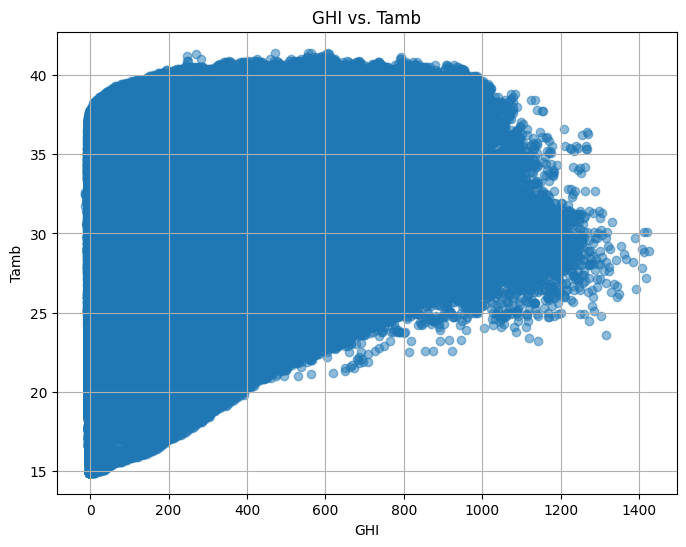

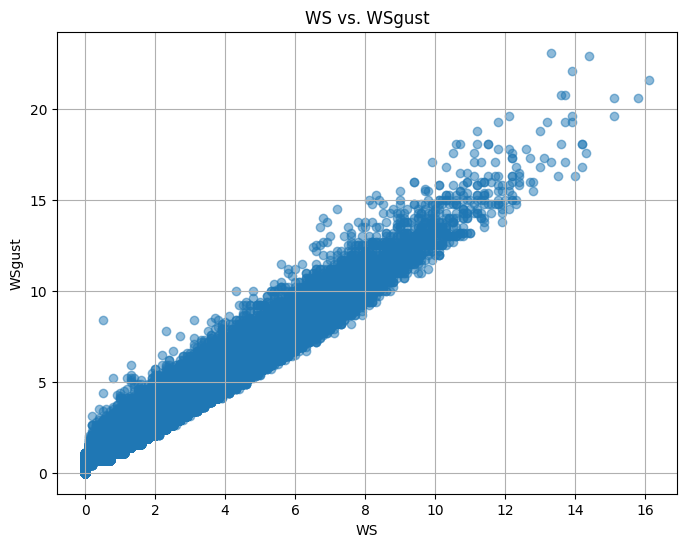

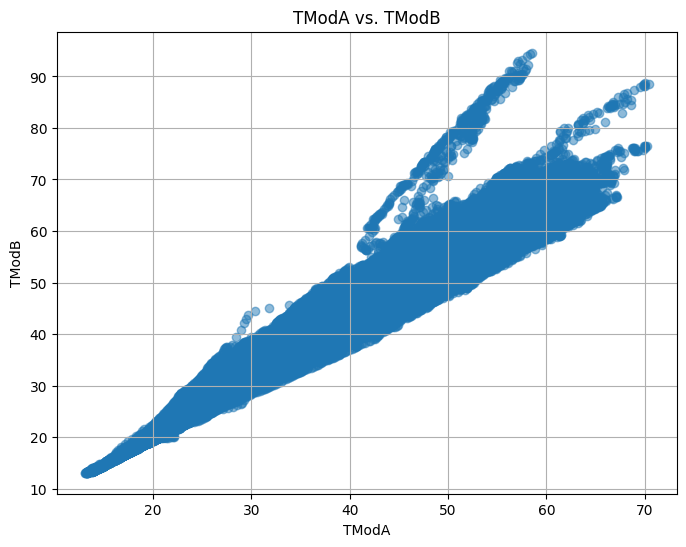

In [13]:
# Scatter plots (
scatter_plot_pairs = [
    ('GHI', 'Tamb'),  # GHI vs. Ambient Temperature
    ('WS', 'WSgust'),   # Wind Speed vs. Wind Gust
    ('TModA', 'TModB'),  # Module Temperature A vs. Module Temperature B
]

# Create scatter plots for each pair of variables
for x_col, y_col in scatter_plot_pairs:
    data_analyzer.scatter_plot(x_col, y_col)

In [14]:
# Data Cleaning
cleaned_data = data_analyzer.data_cleaning(drop_comments=True, handle_missing_values='dropna', columns_to_clean=['GHI', 'DNI', 'DHI'])
print(cleaned_data)

                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00  1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00  1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00  1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00  1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00  1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-10-24 23:56:00  0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596 2022-10-24 23:57:00  0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597 2022-10-24 23:58:00  1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598 2022-10-24 23:59:00  1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
525599 2022-10-25 00:00:00  1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          1.1      0.4  227.6 

In [15]:
# Get summary statistics after data cleaning
summary_stats = data_analyzer.summary_statistics(cleaned_data)
print(summary_stats)

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     232.882532     151.258469   
min              2021-10-25 00:01:00       0.000000       0.000000   
25%              2022-01-24 06:00:45       2.200000       0.000000   
50%              2022-04-25 12:00:30       5.200000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     320.855833     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    

In [16]:
# Perform data quality check on cleaned data
data_quality_results = data_analyzer.data_quality_check(['GHI', 'DNI', 'DHI'], cleaned_data)
print(data_quality_results)

{'GHI': {'missing_values': 0, 'negative_values': 0, 'outliers': 318}, 'DNI': {'missing_values': 0, 'negative_values': 0, 'outliers': 1062}, 'DHI': {'missing_values': 0, 'negative_values': 0, 'outliers': 3415}}


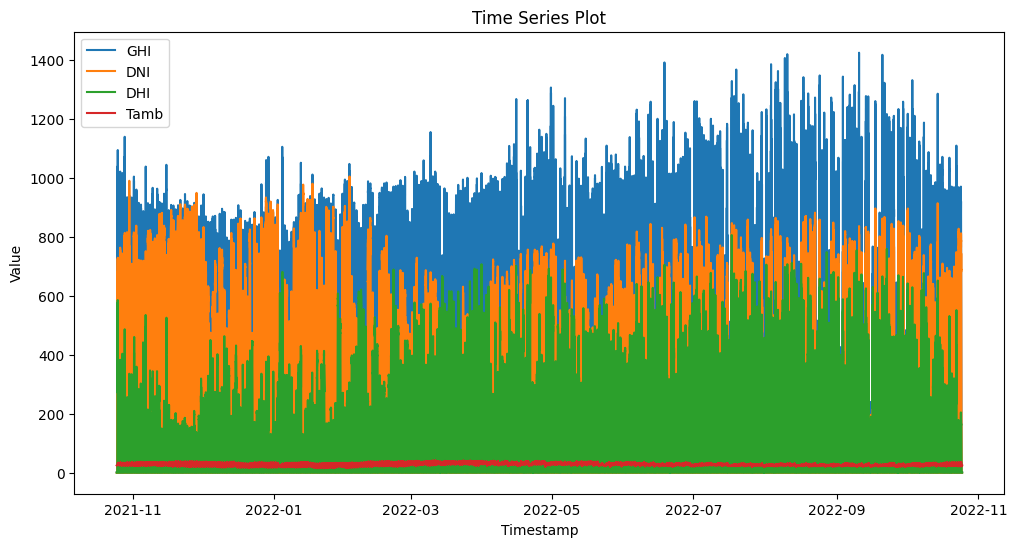

In [17]:
# Time series analysis for temperature and irradiance columns using cleaned data
data_analyzer.time_series_analysis(['GHI', 'DNI', 'DHI', 'Tamb'], cleaned_data)

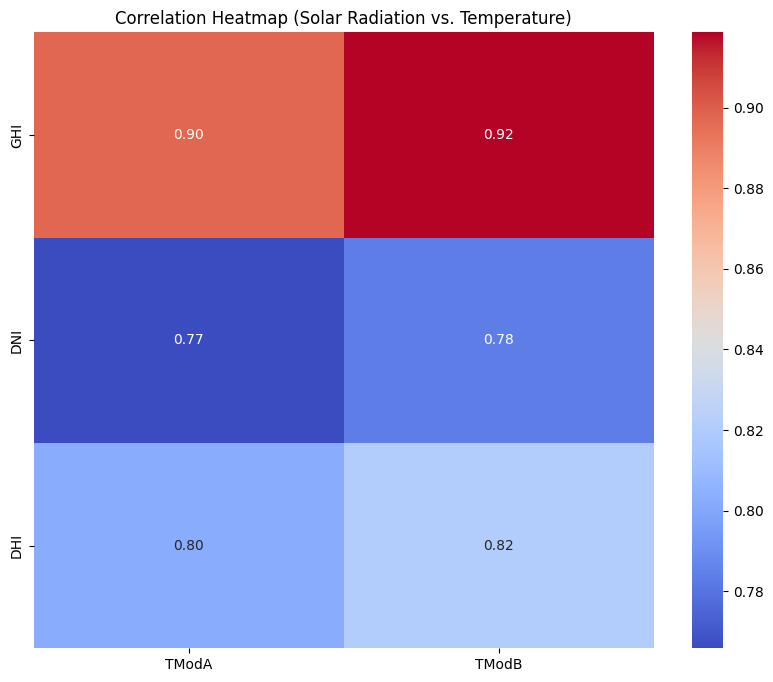

In [18]:
# Perform correlation analysis using cleaned data
data_analyzer.correlation_analysis("Solar Radiation", ['GHI', 'DNI', 'DHI'], "Temperature", ['TModA', 'TModB'], cleaned_data)

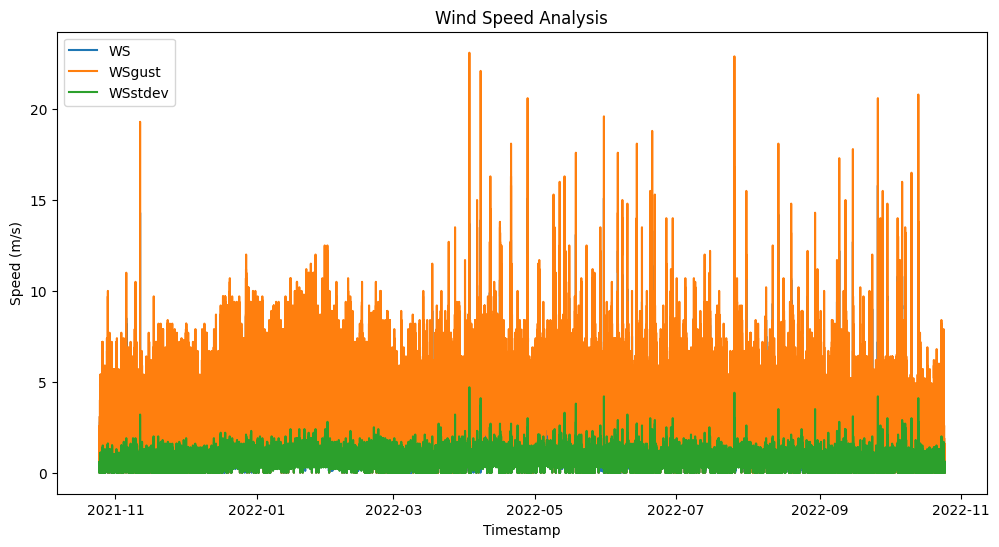

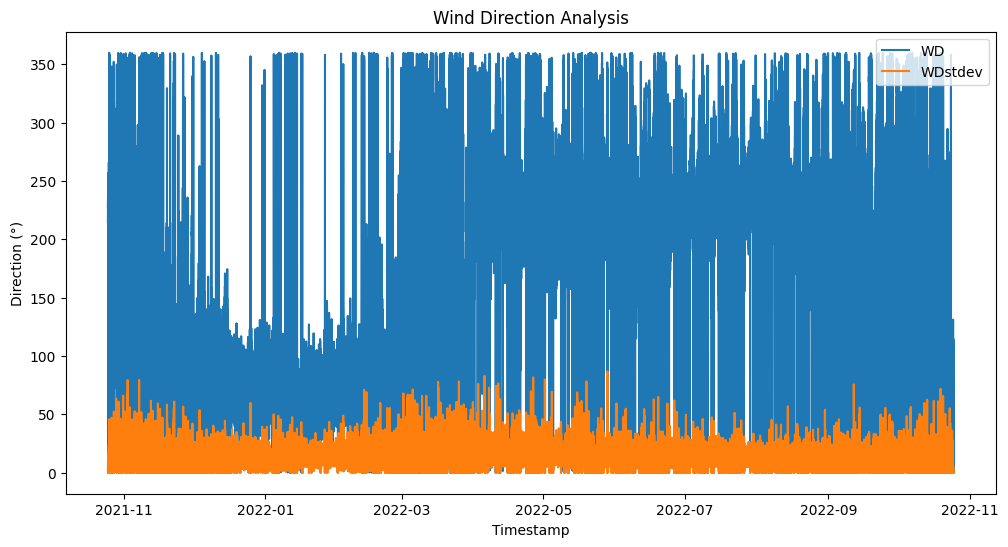

In [19]:
# Wind analysis using cleaned data
data_analyzer.wind_analysis(wind_speed_cols, wind_direction_cols, cleaned_data)

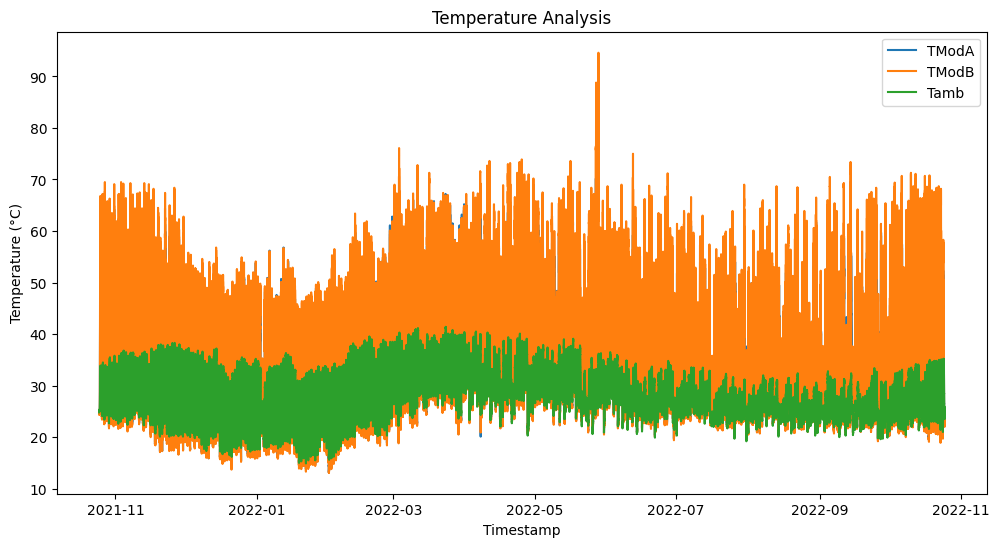

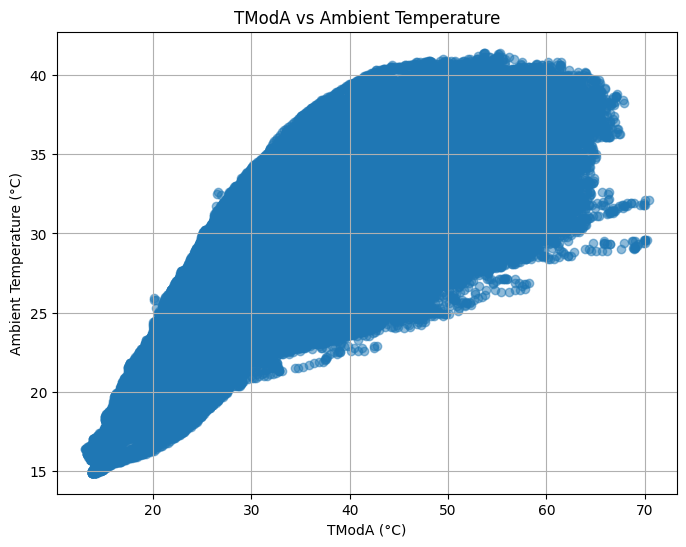

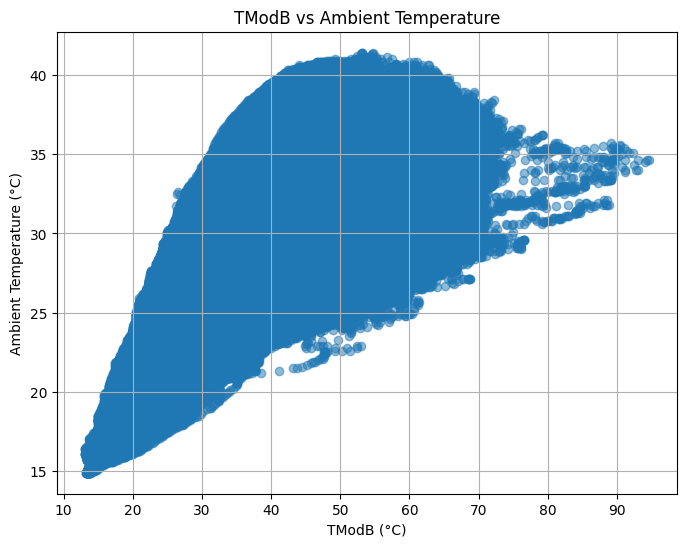

In [20]:
# Temperature analysis for module and ambient temperature columns using cleaned data
data_analyzer.temperature_analysis(temperature_cols, data=cleaned_data) 

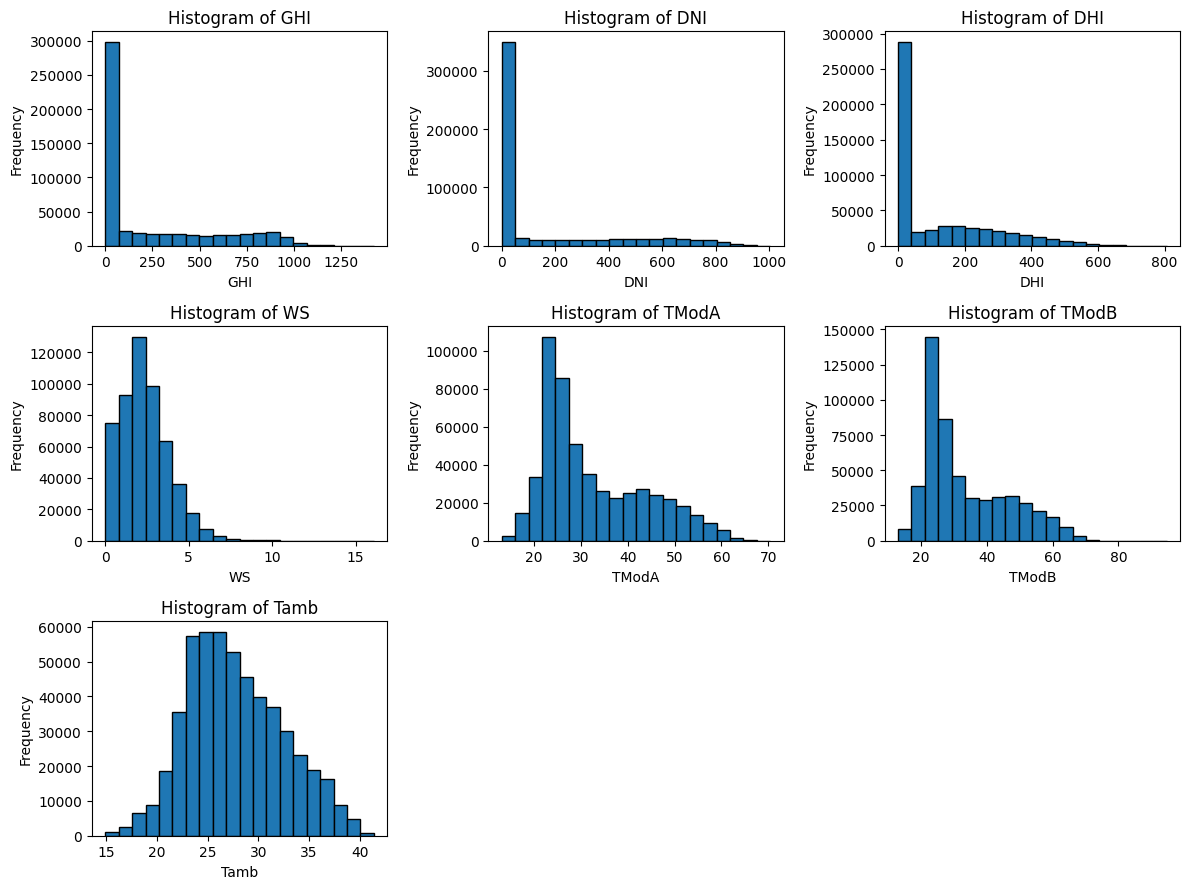

In [21]:
# Create histograms for GHI, DNI, DHI, TModA, WS with cleaned data
data_analyzer.histograms(['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB', 'Tamb'], cleaned_data)

Box Plots for Solar Radiation:


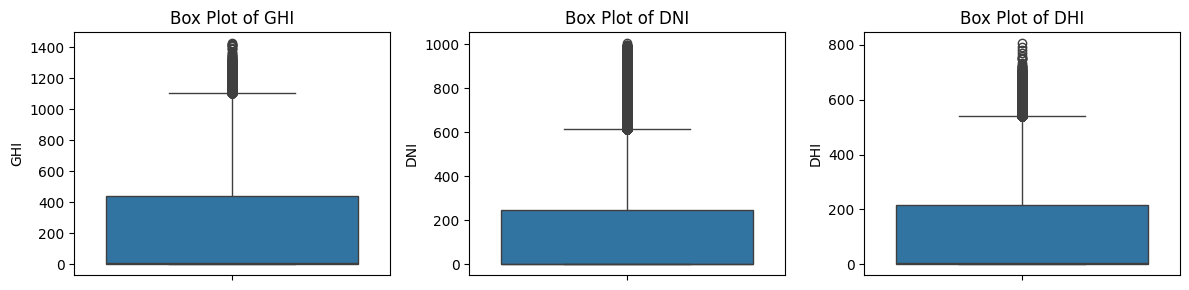

Box Plots for Temperature:


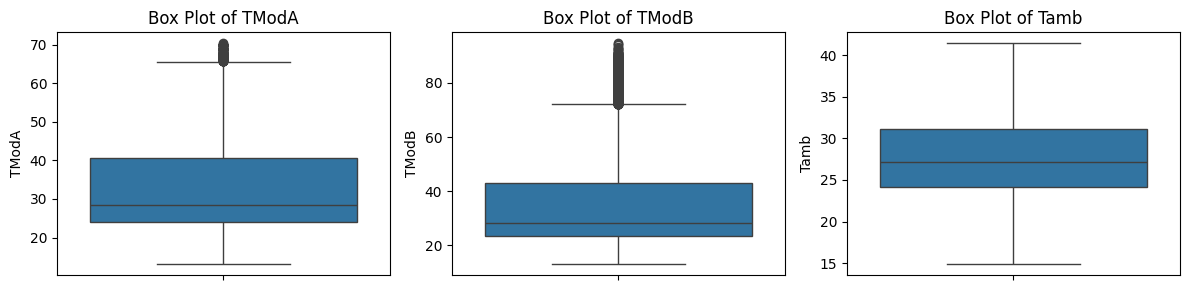

In [22]:
#Box Plots using cleaned data
# Define lists containing solar radiation and temperature columns

# Create box plots for solar radiation data
print("Box Plots for Solar Radiation:")
data_analyzer.box_plots(solar_radiation_cols, cleaned_data)

# Create box plots for temperature data
print("Box Plots for Temperature:")
data_analyzer.box_plots(temperature_cols, cleaned_data)

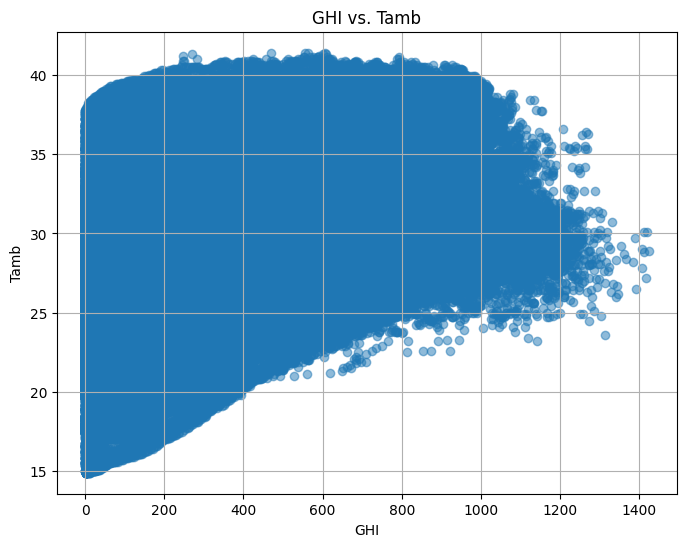

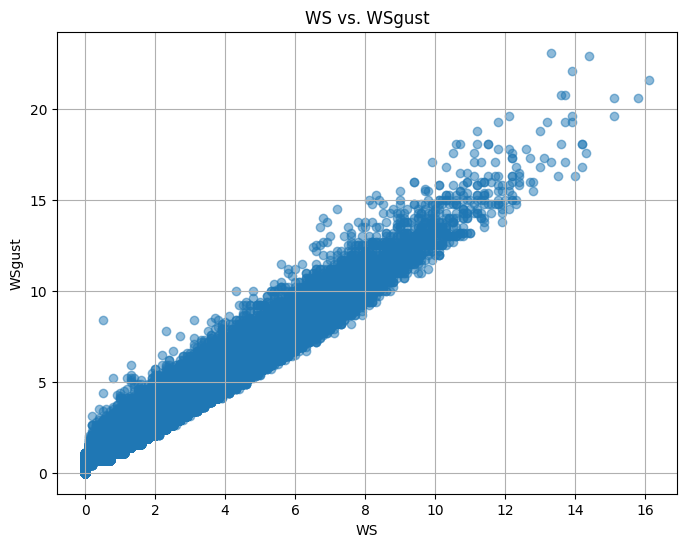

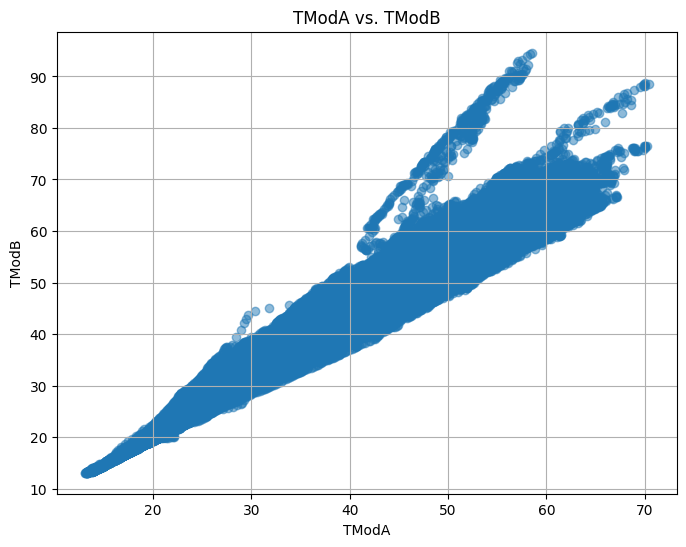

In [23]:
# Scatter plots with the cleaned data

# Create scatter plots for each pair of variables
for x_col, y_col in scatter_plot_pairs:
    data_analyzer.scatter_plot(x_col, y_col, cleaned_data)